In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

plt.rcParams["figure.figsize"] = (12,9)

In [2]:
def get_data(person: str):
    path = f'data/0423/{person}-hangboard/data_labelled.csv'
    with open(path, 'r') as fp:
        data_raw = pd.read_csv(fp)
        
    X = data_raw[[f'EMG{i}' for i in range(8)]]
    holds = data_raw['hold'] + '_' + data_raw['details']
    names = pd.Series([person] * len(holds))
    return X, holds, names

In [3]:
X, holds, names = (
    pd.concat(col).reset_index(drop=True) for col in zip(*[
        get_data(name) for name in ['jonas', 'gregor', 'nikolai', 'jannis'
    ]])
)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

def rforest_fit_transform(omitting_name):
    y = holds.fillna('idle')
    c = (names == omitting_name)
    
    X_train, X_test, y_train, y_test = (X[~c], X[c], y[~c], y[c])
    classifier = RandomForestClassifier(random_state=0)
    classifier.fit(X_train, y_train)
    
    y_pred = pd.Series(classifier.predict(X_test))
    y_pred.index = y_test.index
    return y_test, y_pred, classifier

# gregor

accuracy: 0.6236314810989465


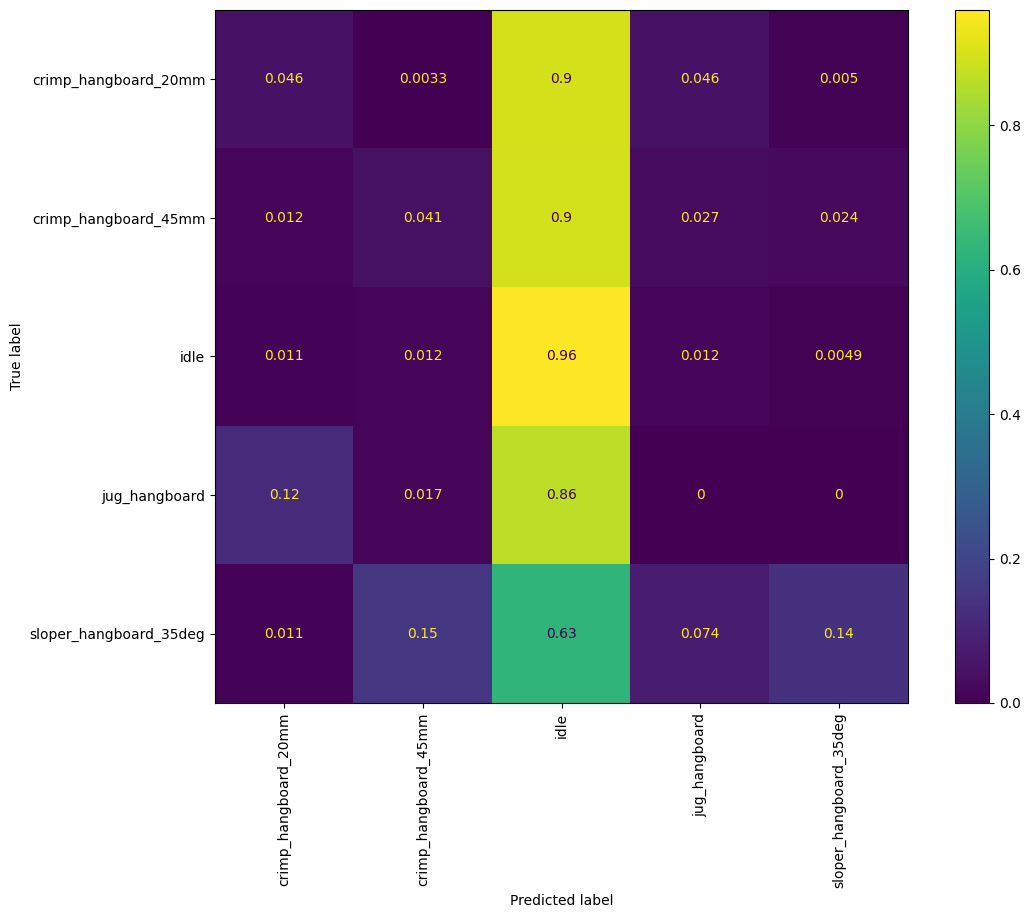

# jannis

accuracy: 0.6984227797184291


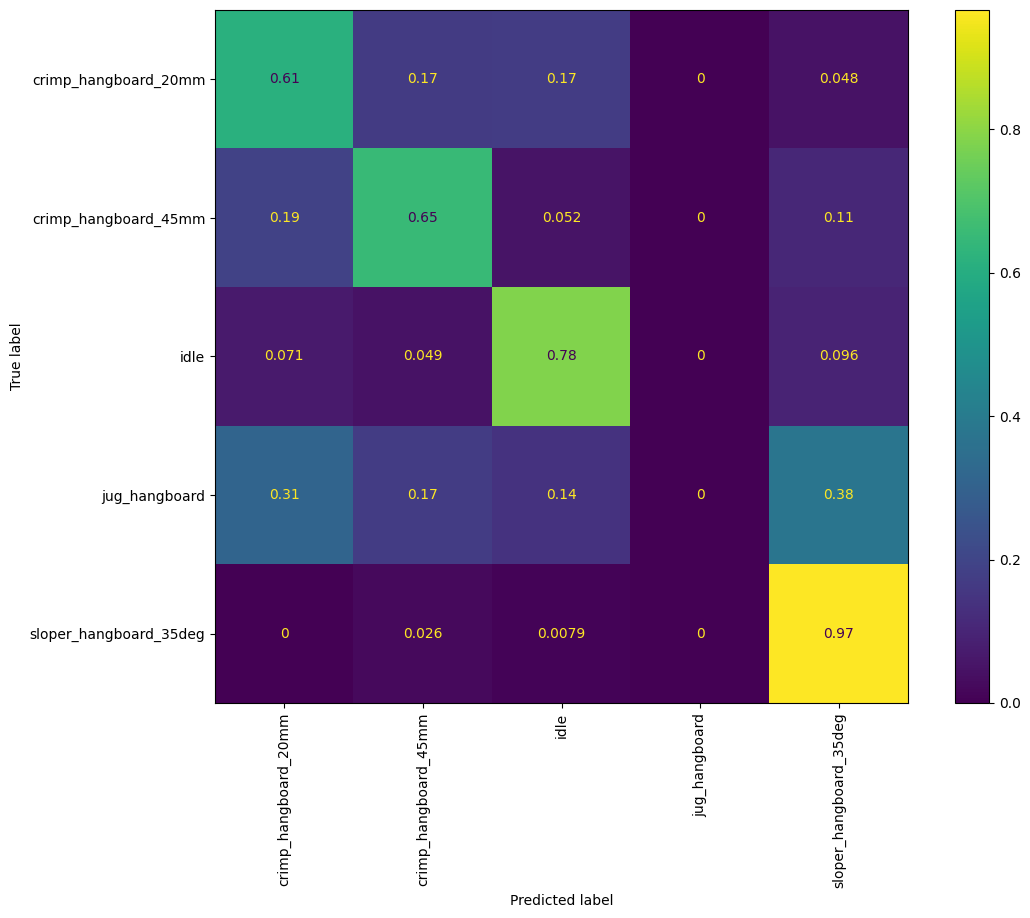

# jonas

accuracy: 0.6514147336222279


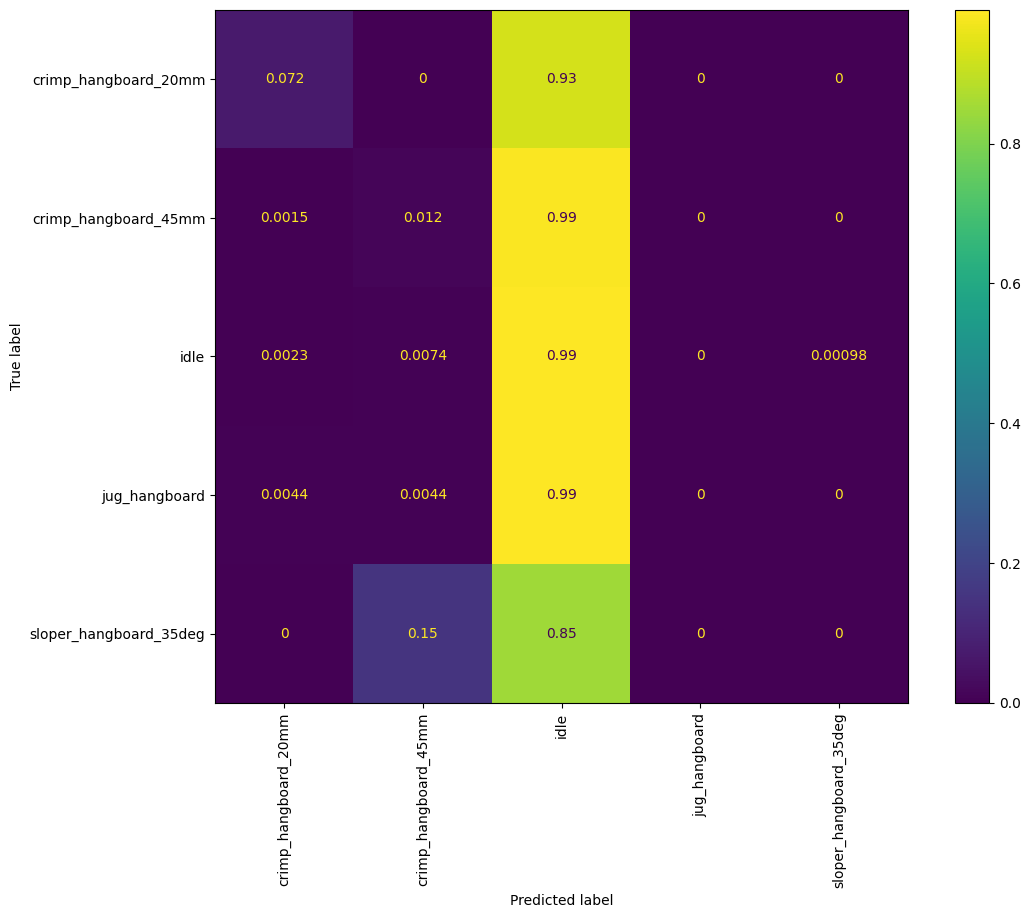

# nikolai

accuracy: 0.5843182003423262


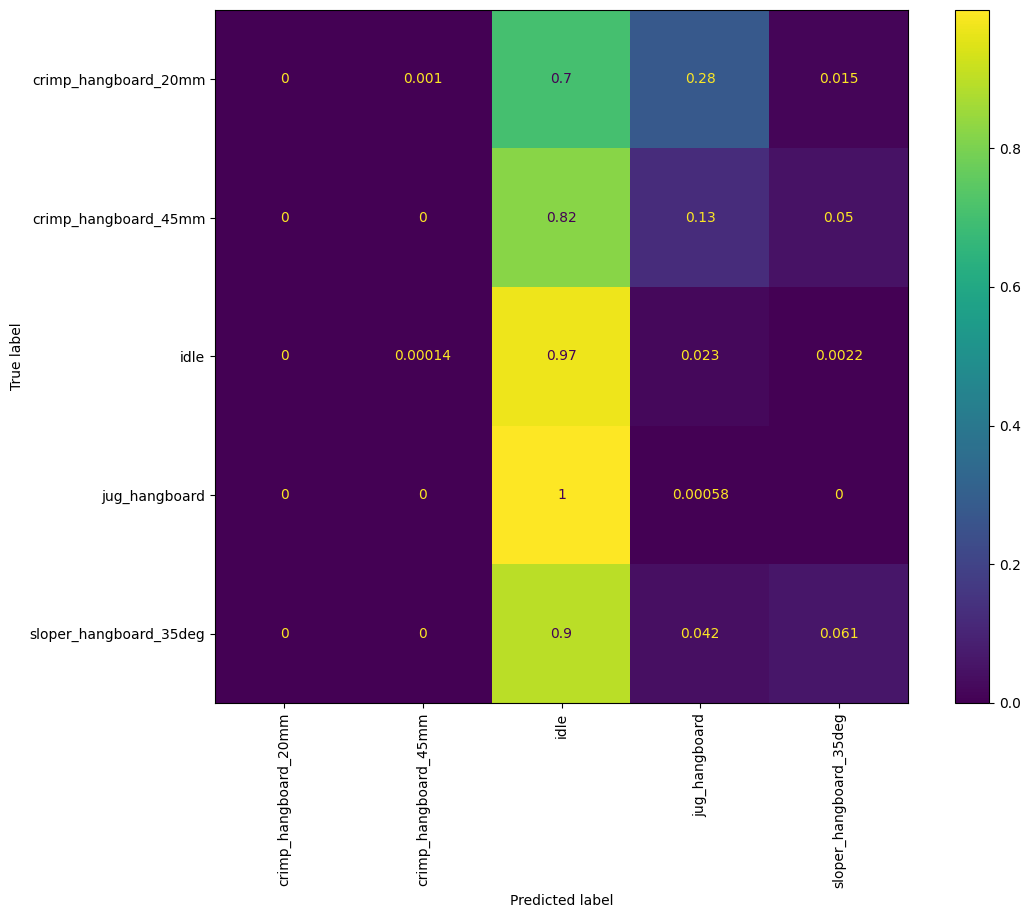

In [17]:
def _report(title, t, p):
    display(Markdown(f'# {title}'))
    print(f'accuracy: {accuracy_score(t, p)}')
    ConfusionMatrixDisplay.from_predictions(
        t, p,
        labels=classifier.classes_,
        normalize='true',
        xticks_rotation='vertical'
    )
    plt.show()

for name in pd.Categorical(names).categories:
    t, p, classifier = rforest_fit_transform(name)
    _report(name, t, p)